In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("catfish_wide_unit1.csv")

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True) #set date as index
df.head()

,CatfishFarm Price,CatfishProcessor Price
DATE,,
1986-01-01,70.0,201.0
1986-02-01,70.0,199.0
1986-03-01,72.0,199.7
1986-04-01,74.0,207.1
1986-05-01,72.0,203.9


In [4]:
atts=df.columns
print(atts)

Index(['CatfishFarm Price', 'CatfishProcessor Price'], dtype='object')


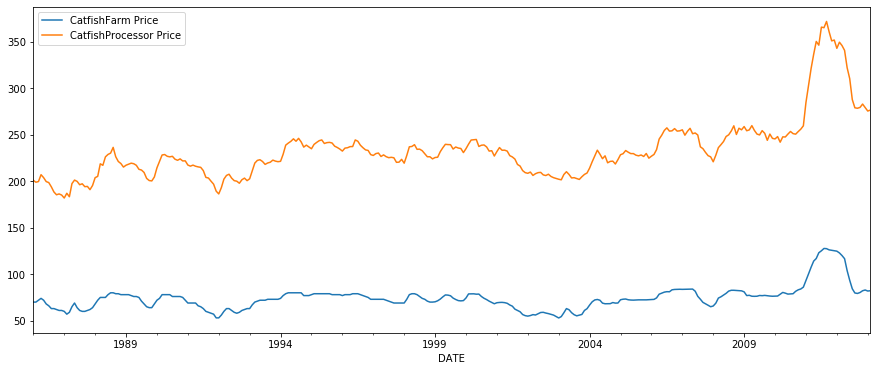

In [5]:
df.plot(figsize=(15,6))
plt.show()

# VECTOR ARMA

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from chart_studio.plotly import plot_mpl
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, SVAR, VARMAX
import seaborn as sns
from statsmodels.tsa.base.datetools import dates_from_str

# data transforms

In [7]:
df_trans=np.log(df).diff().dropna()

In [8]:
# inverting transformation
# first difference
#data_log_diff=np.log(data).diff().dropna()

def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return np.exp(df_fc)

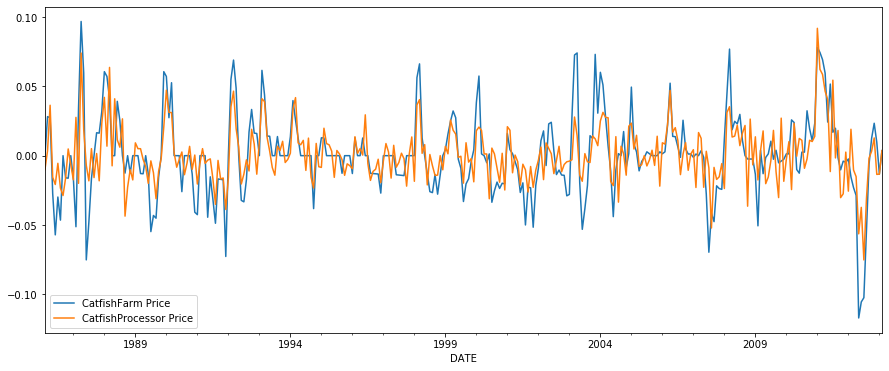

In [10]:
df_trans.plot(figsize=(15,6))
plt.show()

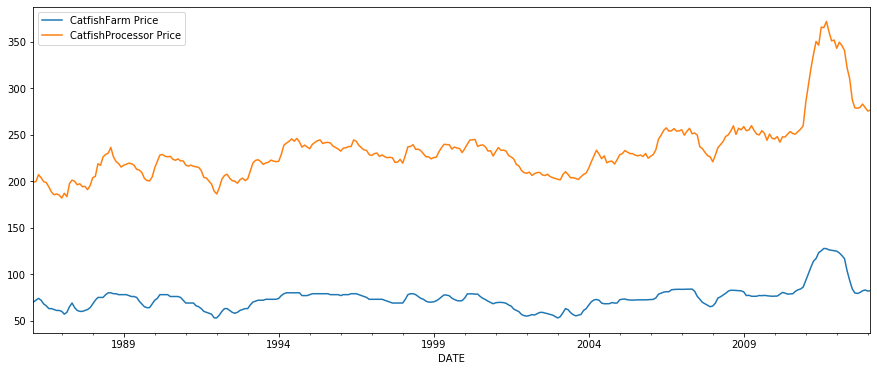

In [13]:
df_convert=np.exp(df_trans.cumsum()+np.log(df.iloc[0]))

df_convert.plot(figsize=(15,6))
plt.show()

In [14]:
n=len(df_trans)
#ntra=301
ntes=24 # 2 years
ntra=n-ntes
#ntes=n-ntra
train=df_trans[:ntra]
test =df_trans[ntra:]

In [15]:
print(n,ntra,ntes)

325 301 24


# VARMAX

In [60]:
def auto_VARMAX(train, max_p=5,max_q=5):
    model_best=VARMAX(train).fit()
    for p in range(max_p):
        for q in range(max_q):
            if ((p>0) or (q>0)):
                model=VARMAX(train,order=(p,q)).fit()
                #print('AIC: ',model.aic)
                if model.aic< model_best.aic:
                    model_best=model
    return model_best

In [61]:
model = auto_VARMAX(train)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3147.9684396674484


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3150.454942065385


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3154.4105176322805


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3165.6339754308565


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC:  -3157.077266276071


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3165.9308414369925


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3163.9310003661


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3156.6283970930226


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3177.740821581974


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC:  -3172.0016768179494


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3170.4195204719244


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3162.6853536306867


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3159.929706065733


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC:  -3167.6497076102364


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC:  -3172.5172297075605


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC:  -3164.656743670908


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3157.4650335783153


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3154.279552163313


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3161.7979489730433


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC:  -3181.241206749941


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3176.48213887134


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC:  -3165.961252269719


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3162.5640260444284


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC:  -3154.224495859117


In [64]:
model.summary()

Dep. Variable:,"['CatfishFarm Price', 'CatfishProcessor Price']",No. Observations:,301
Model:,VAR(4),Log Likelihood,1611.621
,+ intercept,AIC,-3181.241
Date:,"Wed, 20 May 2020",BIC,-3103.392
Time:,21:00:55,HQIC,-3150.089
Sample:,02-01-1986,,
,- 02-01-2011,,
Covariance Type:,opg,,
Ljung-Box (Q):,"33.65, 31.08",Jarque-Bera (JB):,"39.71, 16.90"
Prob(Q):,"0.75, 0.84",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.74, 1.11",Skew:,"0.18, 0.29"


In [65]:
#model = VARMAX(train, order=(2, 3), trend='c')
#model_fit = model.fit(disp=False)
#model_fit.summary()
model_fit=model

In [66]:
print('AIC: ',model_fit.aic)

AIC:  -3181.241206749941


In [69]:
fc = model_fit.forecast(steps=ntes)
pred=model_fit.predict(start=0,end=ntra)

In [135]:
fc.head()

,CatfishFarm Price,CatfishProcessor Price
2011-03-01,0.026285,0.003837
2011-04-01,-0.000938,0.002790
2011-05-01,-0.000774,0.002653
2011-06-01,-0.000402,-0.000124
2011-07-01,-0.000255,0.000599


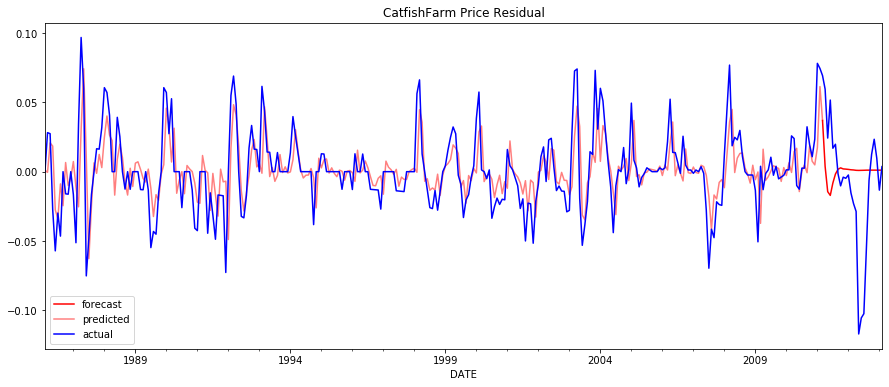

In [87]:
name=atts[0]
fig,ax=plt.subplots(figsize=(15,6))
fc[name].plot(ax=ax,color='red',label='forecast')
pred[name].plot(ax=ax,color='red',label='predicted',alpha=0.5)
#train[name.plot(ax=ax, color='blue',label='actual')
df_trans[name].plot(ax=ax, color='blue',label='actual')
plt.legend()
plt.title(name+" Residual")
plt.show()

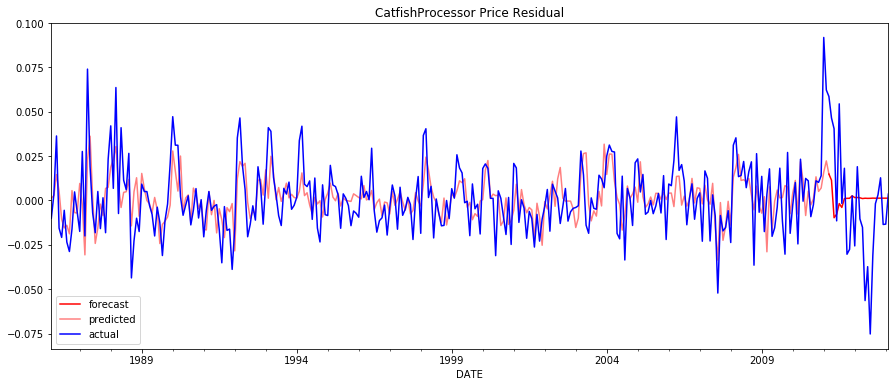

In [88]:
name=atts[1]
fig,ax=plt.subplots(figsize=(15,6))
fc[name].plot(ax=ax,color='red',label='forecast')
pred[name].plot(ax=ax,color='red',label='predicted',alpha=0.5)
#train[name].plot(ax=ax, color='blue',label='actual')
df_trans[name].plot(ax=ax, color='blue',label='actual')
plt.legend()
plt.title(name+" Residual")
plt.show()

In [83]:
df_pred_fc=pd.concat([pred,fc],axis=0)
df_train_test=pd.concat([train,test],axis=0)
df_inv_train_test=np.exp(df_train_test.cumsum()+np.log(df.iloc[0]))
df_inv_pred_fc=np.exp(df_pred_fc.cumsum()+np.log(df.iloc[0]))

df_inv_pred=df_inv_pred_fc[:ntra+1]
df_inv_fc=df_inv_pred_fc[ntra:]

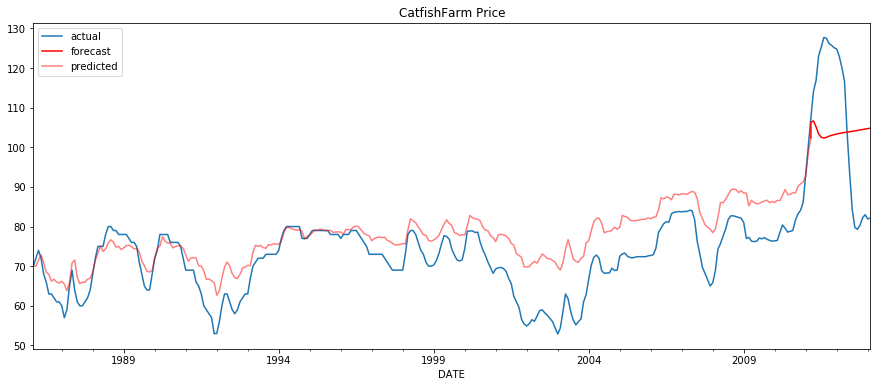

In [84]:
name=atts[0]
ax=df_convert[name].plot(figsize=(15,6),label='actual')
df_inv_fc[name].plot(ax=ax,color='red',label='forecast')
df_inv_pred[name].plot(ax=ax,color='red',alpha=0.5,label='predicted')
plt.title(name)
plt.legend()
plt.show()

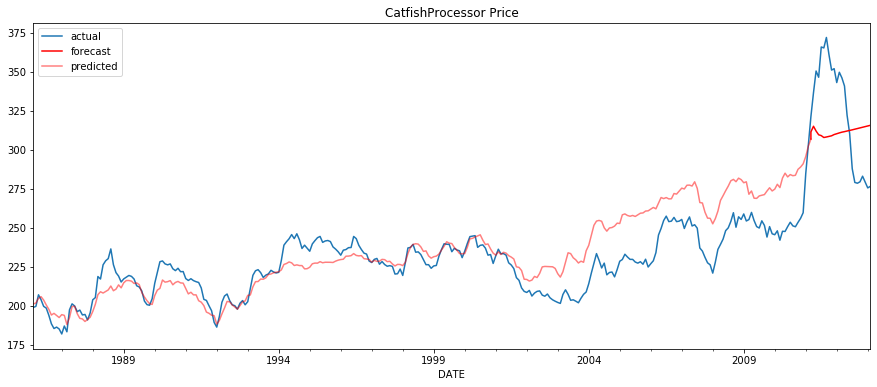

In [85]:
name=atts[1]
ax=df_convert[name].plot(figsize=(15,6),label='actual')
df_inv_fc[name].plot(ax=ax,color='red',label='forecast')
df_inv_pred[name].plot(ax=ax,color='red',alpha=0.5,label='predicted')
plt.title(name)
plt.legend()
plt.show()

# END

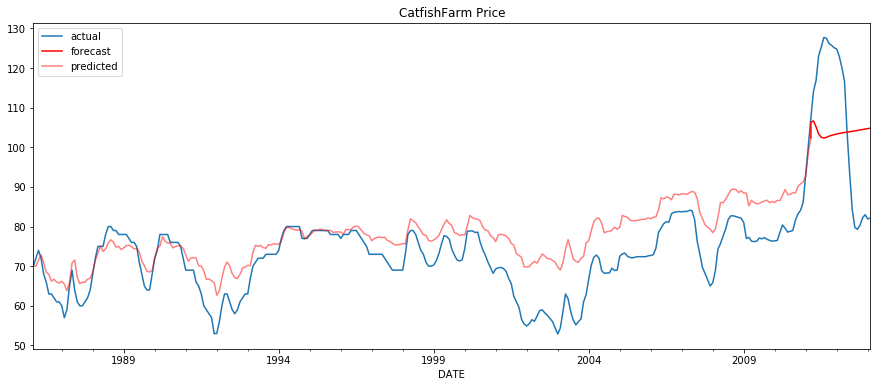

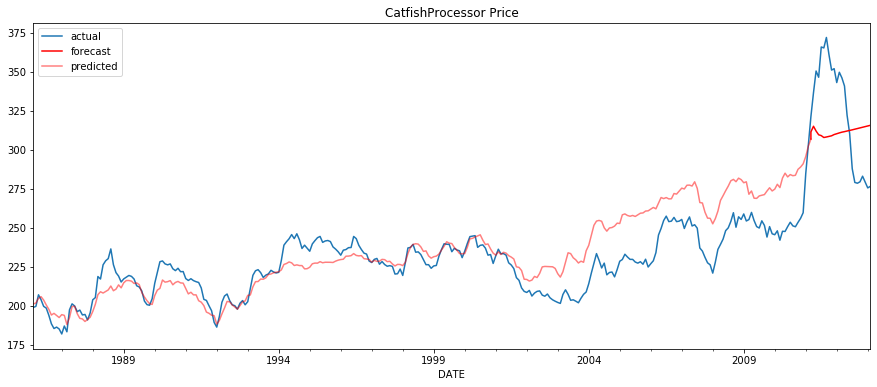

In [86]:
for name in atts:
    ax=df_convert[name].plot(figsize=(15,6),label='actual')
    df_inv_fc[name].plot(ax=ax,color='red',label='forecast')
    df_inv_pred[name].plot(ax=ax,color='red',alpha=0.5,label='predicted')
    plt.title(name)
    plt.legend()
    plt.show()

In [141]:
df_forecast.head()

,CatfishFarm Price,CatfishProcessor Price,CatfishFarm Price_forecast,CatfishProcessor Price_forecast
DATE,,,,
2011-03-01,1.071785,1.060396,1.154672,1.128556
2011-04-01,1.061395,1.047619,1.225564,1.182297
2011-05-01,1.024540,1.041295,1.255639,1.231120
2011-06-01,1.053037,0.988588,1.322234,1.217071
2011-07-01,1.017059,1.055988,1.344791,1.285213


In [ ]:
# from statsmodels.tsa.statespace.varmax import VARMAX

In [18]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [19]:
model=VARMAX(train,order=(2,3)).fit()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [20]:
model.summary()

Dep. Variable:,"['CatfishFarm Price', 'CatfishProcessor Price']",No. Observations:,301
Model:,"VARMA(2,3)",Log Likelihood,1604.965
,+ intercept,AIC,-3159.930
Date:,"Wed, 20 May 2020",BIC,-3067.252
Time:,20:28:59,HQIC,-3122.844
Sample:,02-01-1986,,
,- 02-01-2011,,
Covariance Type:,opg,,
Ljung-Box (Q):,"36.06, 36.56",Jarque-Bera (JB):,"45.36, 17.18"
Prob(Q):,"0.65, 0.63",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.71, 1.10",Skew:,"0.13, 0.25"


In [34]:
fc=model.forecast(ntes)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [30]:
pred=model.predict(start=0,end=ntra)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [38]:

df_pred=pd.concat([pred,fc],axis=0)
df_data=pd.concat([train,test],axis=0)

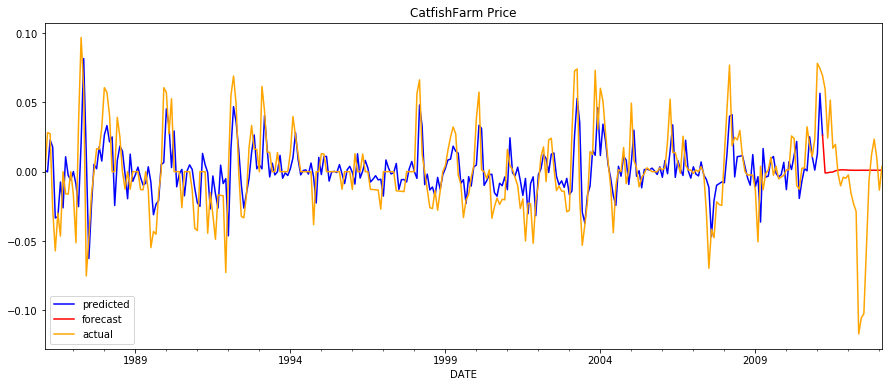

In [53]:
name=atts[0]

ax=pred[name].plot(figsize=(15,6),color='blue',label='predicted')
fc[name].plot(ax=ax,color='red',label='forecast')
df_data[name].plot(ax=ax,color='orange',label='actual')
plt.title(name)
plt.legend()
plt.show()

# VAR model

In [74]:
var=VAR(train)
var_fit=var.fit(2)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [75]:
var_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, May, 2020
Time:                     17:02:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.1082
Nobs:                     299.000    HQIC:                  -16.1824
Log likelihood:           1588.15    FPE:                8.92402e-08
AIC:                     -16.2319    Det(Omega_mle):     8.63288e-08
--------------------------------------------------------------------
Results for equation CatfishFarm Price
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                             0.000501         0.001251            0.401           0.689
L1.CatfishFarm Price              0.666051         0.066642            9.994           0.000


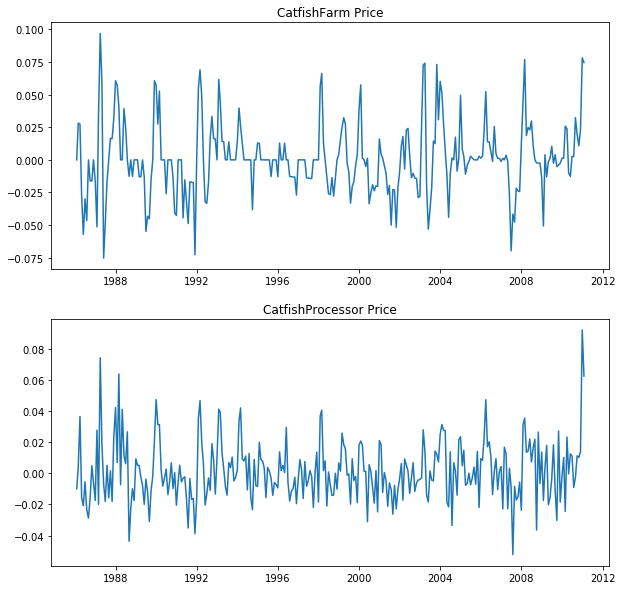

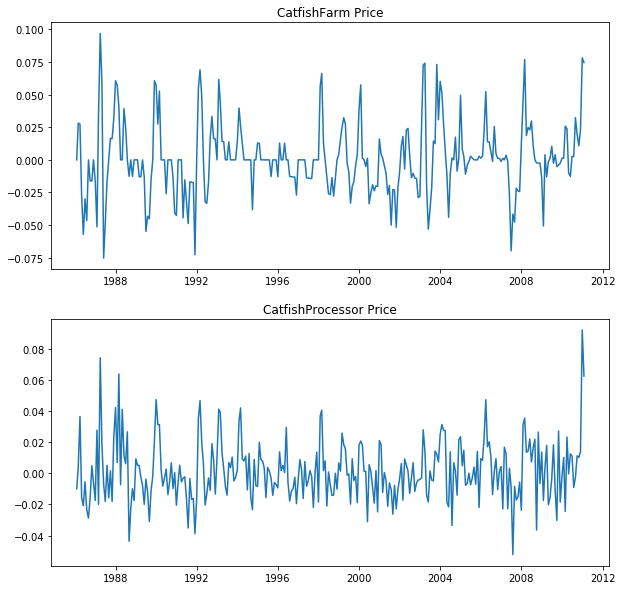

In [77]:
var_fit.plot()

In [79]:
var.select_order(15)
results = var.fit(maxlags=15, ic='aic')

In [80]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, May, 2020
Time:                     17:04:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.0483
Nobs:                     297.000    HQIC:                  -16.1825
Log likelihood:           1591.56    FPE:                8.57269e-08
AIC:                     -16.2721    Det(Omega_mle):     8.07583e-08
--------------------------------------------------------------------
Results for equation CatfishFarm Price
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                             0.000689         0.001256            0.549           0.583
L1.CatfishFarm Price              0.644254         0.069716            9.241           0.000


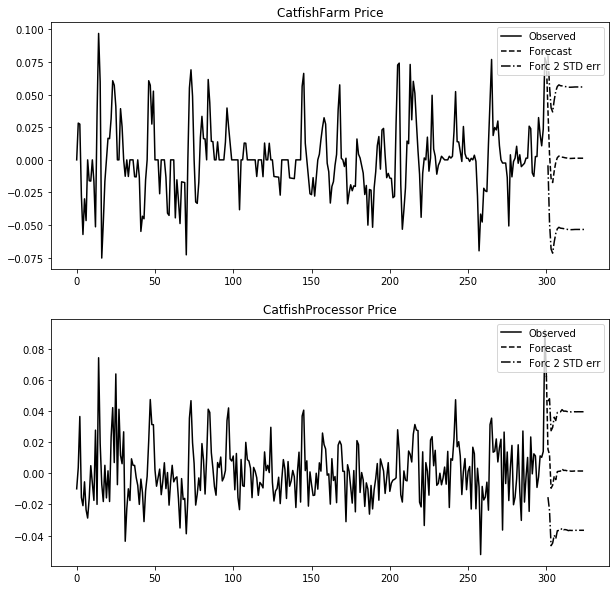

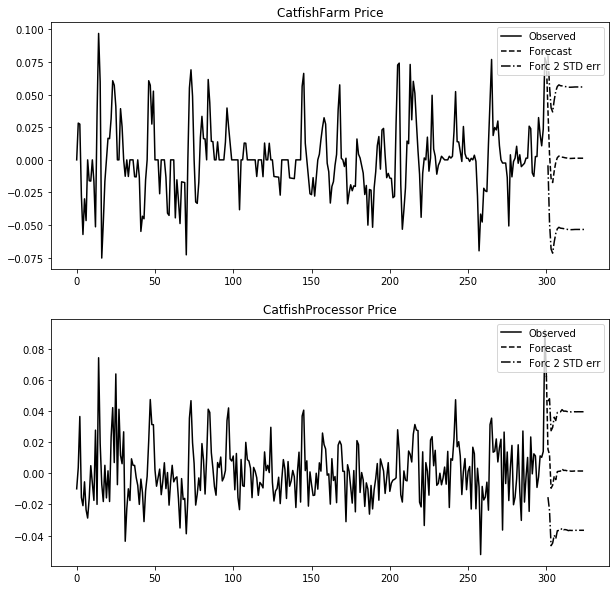

In [81]:
results.plot_forecast(ntes)

In [83]:
df_forecast=invert_transformation(fc)

TypeError: invert_transformation() missing 1 required positional argument: 'df_forecast'